# EE399 HW1
## Ziwen


In [112]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

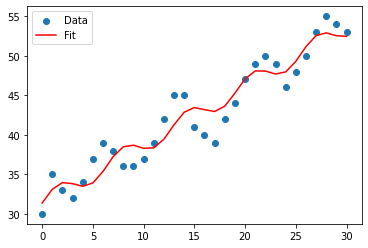

In [113]:
X=np.arange(0,31)
Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

# Define the nonlinear model
def nonlinear_model(x, A, B, C, D):
    return A * np.sin(B * x) + C*x + D


# Fit the model to the data
popt, pcov = curve_fit(nonlinear_model, X, Y)

# Extract the parameters
a_fit, b_fit, c_fit, d_fit = popt

# Plot the data and the fitted curve
plt.scatter(X, Y, label='Data')
plt.plot(X, nonlinear_model(X, a_fit, b_fit, c_fit, d_fit), 'r-', label='Fit')
plt.legend()
plt.show()

## (i)

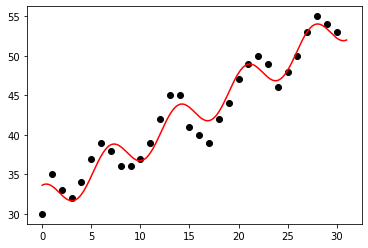

1.592725853040056


In [114]:
def velfit(c, x, y):
    e2 = np.sqrt(np.sum((c[0]*np.cos(c[1]*x)+c[2]*x+c[3]-y)**2)/len(x))
    return e2

v0 = np.array([3, 1*np.pi/4, 2/3, 32])   # 3 pi/4 2/3 32

res= opt.minimize(velfit, v0, args=(X, Y), method='Nelder-Mead')

c = res.x

x2 = np.arange(0, 31.01, 0.01)
yfit2 = (c[0]*np.cos(c[1]*x2)+c[2]*x2+c[3])

plt.plot(np.arange(0, 31), Y, 'ko')
plt.plot(x2, yfit2, 'r-')
plt.show()
print(res.fun)

## (ii)

Text(0, 0.5, 'B')

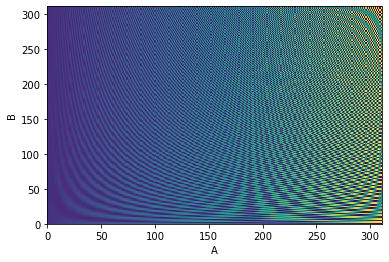

In [115]:
#sweeping through A and B, fix C and D
A_range = np.arange(0, 31.01, 0.1)
B_range = np.arange(0, 31.01, 0.1)
x2 = np.arange(0, 31.01, 0.1)
AA_range, BB_range = np.meshgrid(A_range, B_range, indexing='xy')
def mesplot(c,x,A,B):
    return (A*np.cos(B*x)+c[2]*x+c[3])

plt.pcolor(mesplot(c,x2,AA_range,BB_range))
plt.xlabel("A")
plt.ylabel("B")

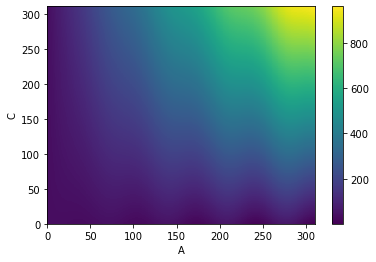

In [116]:
#sweeping through A and C, fix B and D
A_range = np.arange(0, 31.01, 0.1)
C_range = np.arange(0, 31.01, 0.1)
x2 = np.arange(0, 31.01, 0.1)
AA_range, CC_range = np.meshgrid(A_range, C_range, indexing='xy')
def mesplot(c,x,A,C):
    return (A*np.cos(c[1]*x)+C*x+c[3])

plt.pcolor(mesplot(c,x2,AA_range,CC_range))
plt.xlabel("A")
plt.ylabel("C")
plt.colorbar()

Text(0, 0.5, 'C')

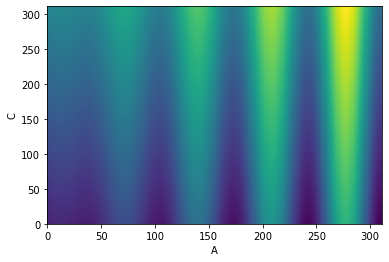

In [117]:
#sweeping through A and D, fix B and C
A_range = np.arange(0, 31.01, 0.1)
D_range = np.arange(0, 31.01, 0.1)
x2 = np.arange(0, 31.01, 0.1)
AA_range, DD_range = np.meshgrid(A_range, D_range, indexing='xy')
def mesplot(c,x,A,D):
    return (A*np.cos(c[1]*x)+c[2]*x+D)

plt.pcolor(mesplot(c,x2,AA_range,DD_range))
plt.xlabel("A")
plt.ylabel("C")

Text(0, 0.5, 'C')

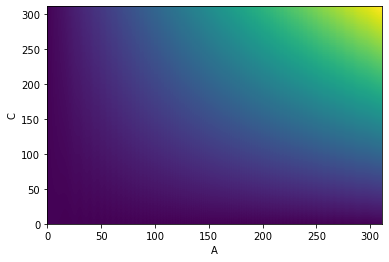

In [118]:
#sweeping through B and C, fix A and D
B_range = np.arange(0, 31.01, 0.1)
C_range = np.arange(0, 31.01, 0.1)
x2 = np.arange(0, 31.01, 0.1)
BB_range, CC_range = np.meshgrid(B_range, C_range, indexing='xy')
def mesplot(c,x,B,C):
    return (c[0]*np.cos(B*x)+C*x+c[3])

plt.pcolor(mesplot(c,x2,BB_range,CC_range))
plt.xlabel("A")
plt.ylabel("C")

Text(0, 0.5, 'C')

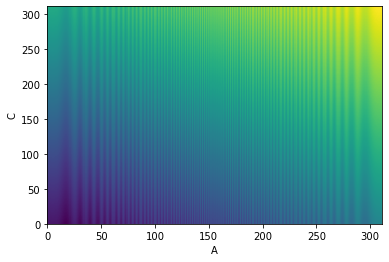

In [119]:
#sweeping through B and D, fix A and C
B_range = np.arange(0, 31.01, 0.1)
D_range = np.arange(0, 31.01, 0.1)
x2 = np.arange(0, 31.01, 0.1)
BB_range, DD_range = np.meshgrid(B_range, D_range, indexing='xy')
def mesplot(c,x,B,D):
    return (c[0]*np.cos(B*x)+c[2]*x+D)

plt.pcolor(mesplot(c,x2,BB_range,DD_range))
plt.xlabel("A")
plt.ylabel("C")

Text(0, 0.5, 'C')

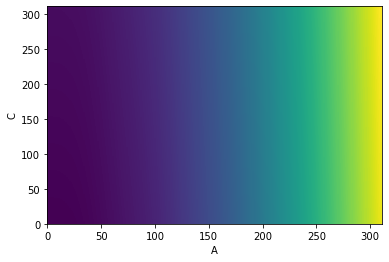

In [120]:
#sweeping through C and D, fix A and B
C_range = np.arange(0, 31.01, 0.1)
D_range = np.arange(0, 31.01, 0.1)
x2 = np.arange(0, 31.01, 0.1)
CC_range, DD_range = np.meshgrid(C_range, D_range, indexing='xy')
def mesplot(c,x,C,D):
    return (c[0]*np.cos(c[1]*x)+C*x+D)

plt.pcolor(mesplot(c,x2,CC_range,DD_range))
plt.xlabel("A")
plt.ylabel("C")

## (iii)

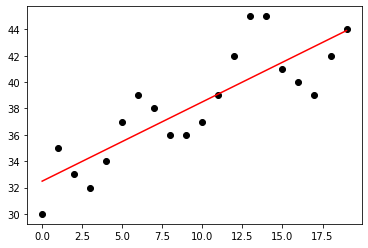

2.242749387002417


In [122]:
x_20 = X[0:20]
y_20 = Y[0:20]
#line fit
def velfit(c, x, y):
    e2 = np.sqrt(np.sum((c[0]*x+c[1]-y)**2)/len(x))
    return e2

v0 = np.array([3, 3])   # 3 3

res= opt.minimize(velfit, v0, args=(x_20, y_20), method='Nelder-Mead')

c = res.x

x2 = np.arange(0, 31.01, 0.01)
yfit2 = (c[0]*x_20+c[1])

plt.plot(x_20, y_20, 'ko')
plt.plot(x_20, yfit2, 'r-')
plt.show()
print(res.fun)


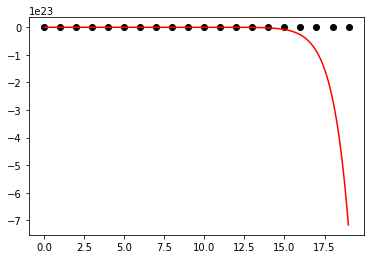

2.224331624925728e-05
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [158]:
x_20 = X[0:20]
y_20 = Y[0:20]
#19th polynomial
def velfit(c, x, y):
    e2 = np.sqrt(np.sum((np.poly1d(c)-y)**2)/len(x))
    return e2

v0 = np.array([0.01, 0.000001,0.000001,0.000001,0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001,0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 3, 3, 3])

res= opt.minimize(velfit, v0, args=(x_20, y_20), method='Nelder-Mead')

c = res.x

x2 = np.arange(0, 19, 0.01)
yfit2 = np.poly1d(c)

plt.plot(x_20, y_20, 'ko')
plt.plot(x2, yfit2(x2), 'r-')
plt.show()
print(res.fun)